# Upama Roy Chowdhury
# Task_4:‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’.As a security/defense analyst, try to find out the hot zone of terrorism. 

# Dataset: https://bit.ly/2TK5Xn5


In [2]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


In [3]:
df = pd.read_csv('globalterrorismdb_0718dist.csv',low_memory=False, encoding = "ISO-8859-1")
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.shape

(181691, 135)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [8]:
df.count()

eventid       181691
iyear         181691
imonth        181691
iday          181691
approxdate      9239
               ...  
INT_LOG       181691
INT_IDEO      181691
INT_MISC      181691
INT_ANY       181691
related        25038
Length: 135, dtype: int64

In [9]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [10]:
missing_percentage=df.isnull().sum()*100/len(df)
missing_percentage

eventid        0.000000
iyear          0.000000
imonth         0.000000
iday           0.000000
approxdate    94.914993
                ...    
INT_LOG        0.000000
INT_IDEO       0.000000
INT_MISC       0.000000
INT_ANY        0.000000
related       86.219461
Length: 135, dtype: float64

# Plotting heatmap so that which column should be dropped

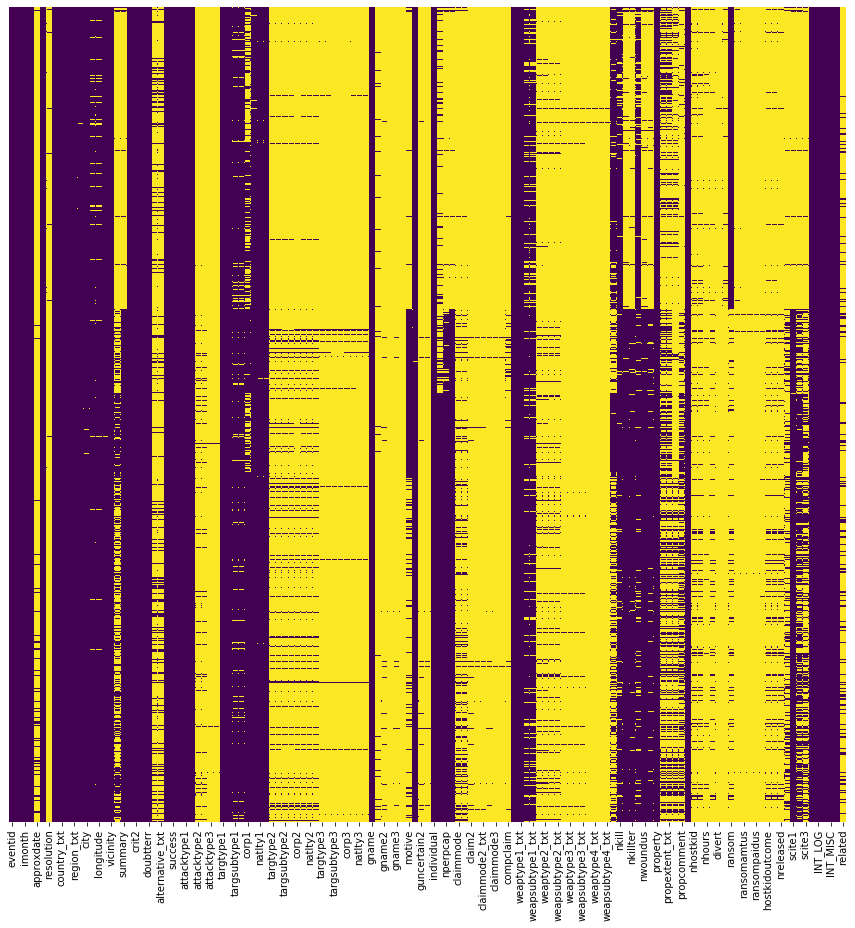

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df.dropna(axis=1,inplace=True)

In [13]:
df.head(5)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,0,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,0,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,0,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,0,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1


In [14]:
df.shape

(181691, 29)

# After dropping some columns again heatmap have been plotted

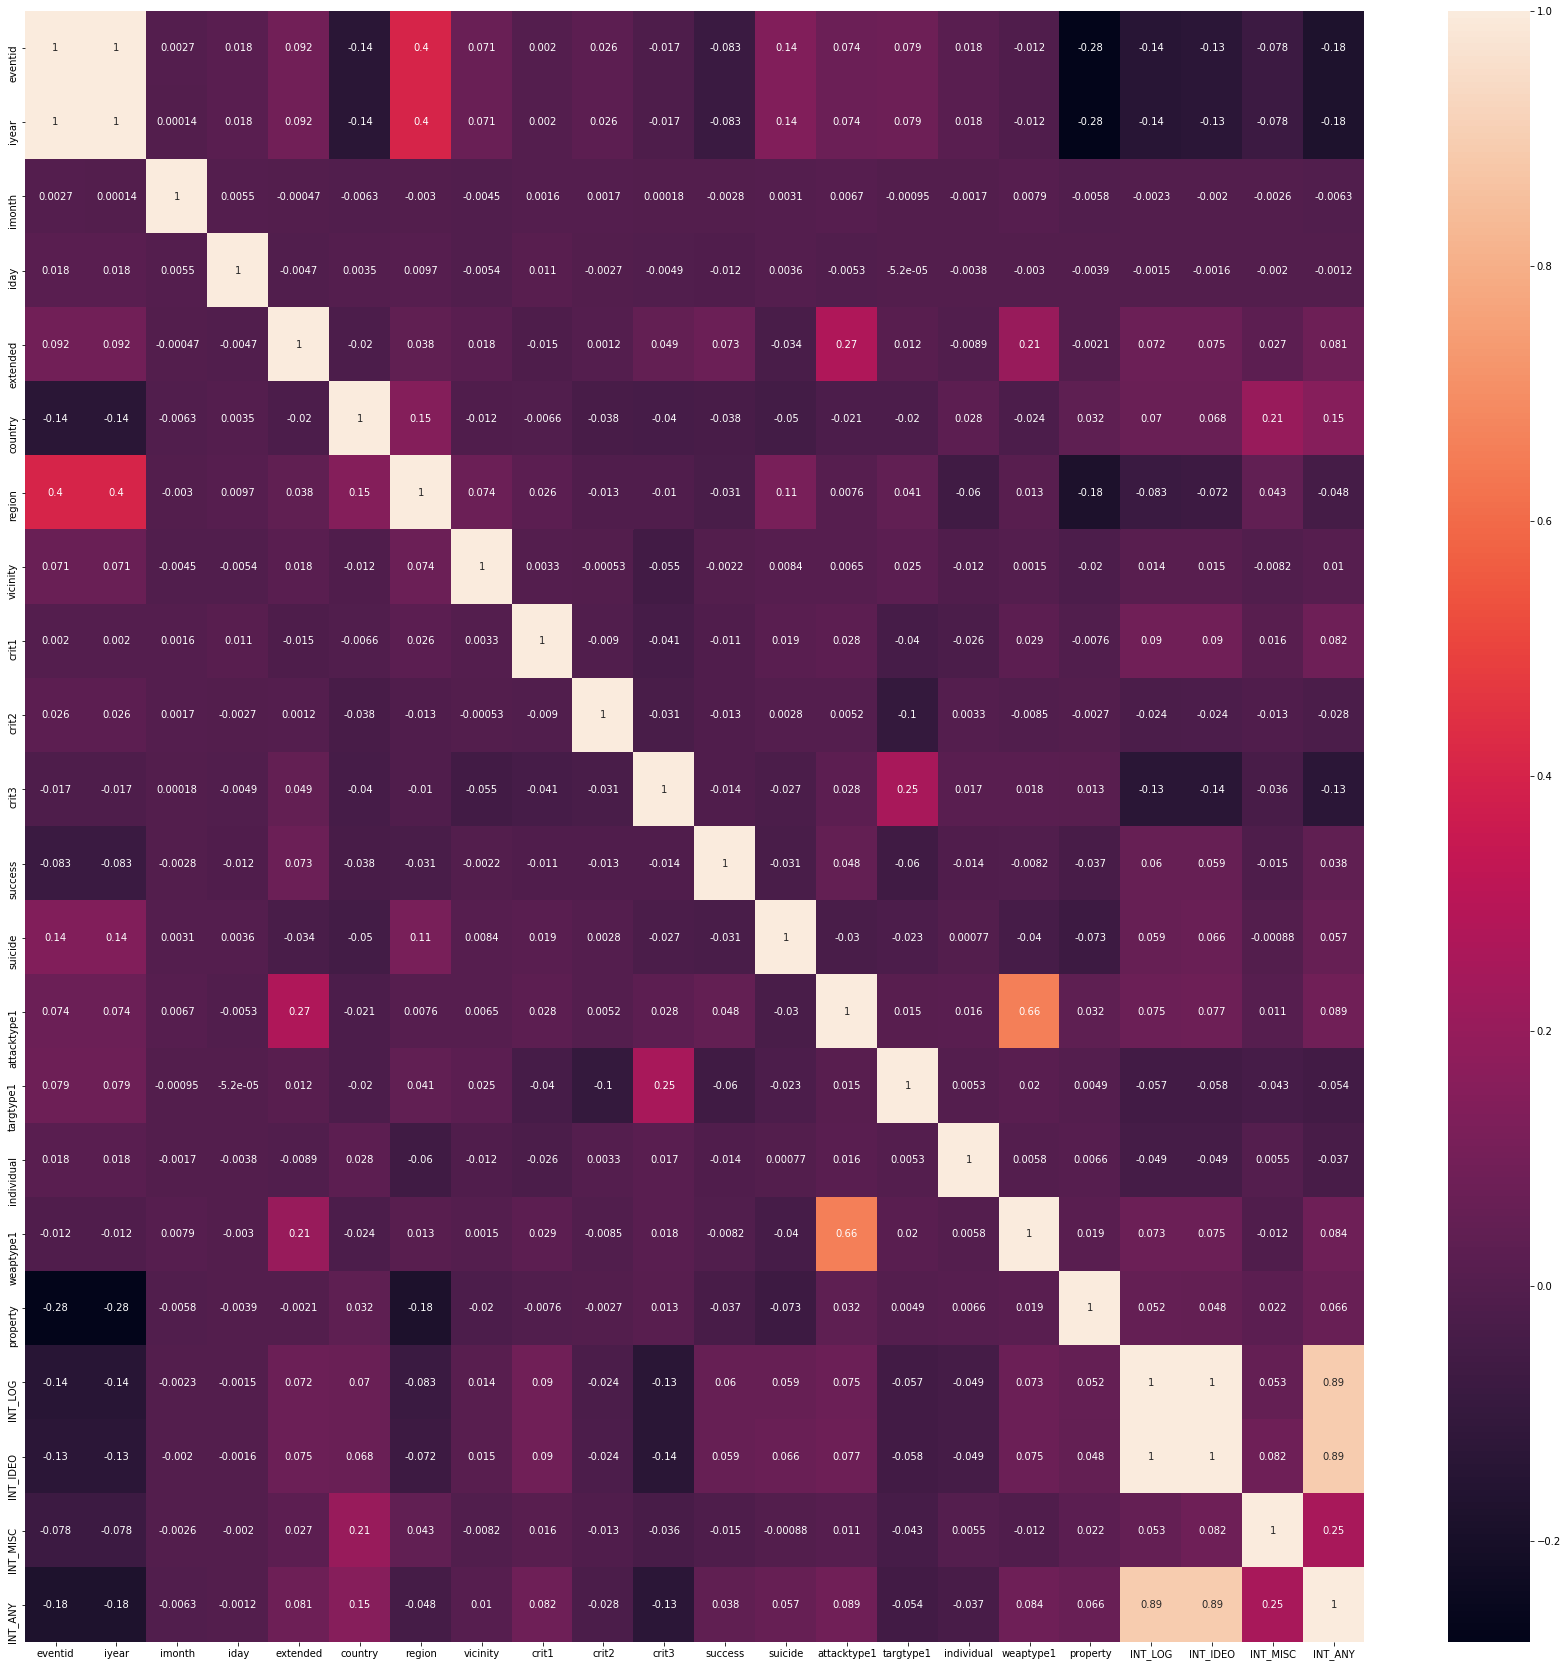

In [15]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

# See the correlation matrix

In [16]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,vicinity,crit1,crit2,...,suicide,attacktype1,targtype1,individual,weaptype1,property,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.070646,0.002019,0.026215,...,0.137743,0.074173,0.079080,0.017939,-0.011716,-0.278927,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.070659,0.001995,0.026211,...,0.137736,0.074153,0.079082,0.017944,-0.011737,-0.278916,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.004501,0.001568,0.001734,...,0.003071,0.006705,-0.000948,-0.001661,0.007863,-0.005816,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,-0.005367,0.011434,-0.002702,...,0.003593,-0.005333,-0.000052,-0.003788,-0.003019,-0.003903,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,0.017784,-0.015029,0.001249,...,-0.033961,0.272272,0.011613,-0.008929,0.207802,-0.002096,0.071768,0.075147,0.027335,0.080767
country,-0.135039,-0.135023,-0.006305,0.003468,-0.020466,1.000000,0.148597,-0.012291,-0.006646,-0.038480,...,-0.050360,-0.021384,-0.019703,0.027918,-0.023708,0.032051,0.069904,0.067564,0.207281,0.153118
region,0.401371,0.401384,-0.002999,0.009710,0.038389,0.148597,1.000000,0.073678,0.025521,-0.013163,...,0.112672,0.007642,0.041396,-0.059963,0.013257,-0.183279,-0.082584,-0.071917,0.043139,-0.047900
vicinity,0.070646,0.070659,-0.004501,-0.005367,0.017784,-0.012291,0.073678,1.000000,0.003330,-0.000534,...,0.008352,0.006504,0.024644,-0.011986,0.001496,-0.019811,0.014487,0.015119,-0.008232,0.010325
crit1,0.002019,0.001995,0.001568,0.011434,-0.015029,-0.006646,0.025521,0.003330,1.000000,-0.008984,...,0.019039,0.027544,-0.040026,-0.025591,0.029257,-0.007595,0.089973,0.089888,0.015692,0.082288
crit2,0.026215,0.026211,0.001734,-0.002702,0.001249,-0.038480,-0.013163,-0.000534,-0.008984,1.000000,...,0.002770,0.005157,-0.101522,0.003311,-0.008549,-0.002711,-0.024153,-0.023829,-0.012980,-0.027752


# Finding unique values

In [17]:
s=pd.value_counts(df['targtype1_txt'])
s1=pd.Series({'nunique':len(s),'unique values':s.index.tolist()})
s.append(s1)

Private Citizens & Property                                                   43511
Military                                                                      27984
Police                                                                        24506
Government (General)                                                          21283
Business                                                                      20669
Transportation                                                                 6799
Utilities                                                                      6023
Unknown                                                                        5898
Religious Figures/Institutions                                                 4440
Educational Institution                                                        4322
Government (Diplomatic)                                                        3573
Terrorists/Non-State Militia                                                

**most targeted areas are private citizens & property, Military,police etc.**

# Which regions are attacked most

In [18]:
s=pd.value_counts(df['region_txt'])
s1=pd.Series({'nunique':len(s),'unique values':s.index.tolist()})
s.append(s1)

Middle East & North Africa                                                 50474
South Asia                                                                 44974
South America                                                              18978
Sub-Saharan Africa                                                         17550
Western Europe                                                             16639
Southeast Asia                                                             12485
Central America & Caribbean                                                10344
Eastern Europe                                                              5144
North America                                                               3456
East Asia                                                                    802
Central Asia                                                                 563
Australasia & Oceania                                                        282
nunique                     

# Which countries are attacked most

In [19]:
s=pd.value_counts(df['country_txt'])
s1=pd.Series({'nunique':len(s),'unique values':s.index.tolist()})
s.append(s1)

Iraq                                                         24636
Pakistan                                                     14368
Afghanistan                                                  12731
India                                                        11960
Colombia                                                      8306
                                       ...                        
International                                                    1
St. Lucia                                                        1
Vatican City                                                     1
nunique                                                        205
unique values    [Iraq, Pakistan, Afghanistan, India, Colombia,...
Length: 207, dtype: object

# Tracking the terrorists

In [20]:
s=pd.value_counts(df['gname'])
s1=pd.Series({'nunique':len(s),'unique values':s.index.tolist()})
s.append(s1)

Unknown                                                                                         82782
Taliban                                                                                          7478
Islamic State of Iraq and the Levant (ISIL)                                                      5613
Shining Path (SL)                                                                                4555
Farabundo Marti National Liberation Front (FMLN)                                                 3351
                                                                          ...                        
Taikosha, right wing group                                                                          1
Basque Justice                                                                                      1
Agwelek Forces                                                                                      1
nunique                                                                           

# Which weapons were used in how many attacks

Text(0.5, 1.0, 'Increase in terror')

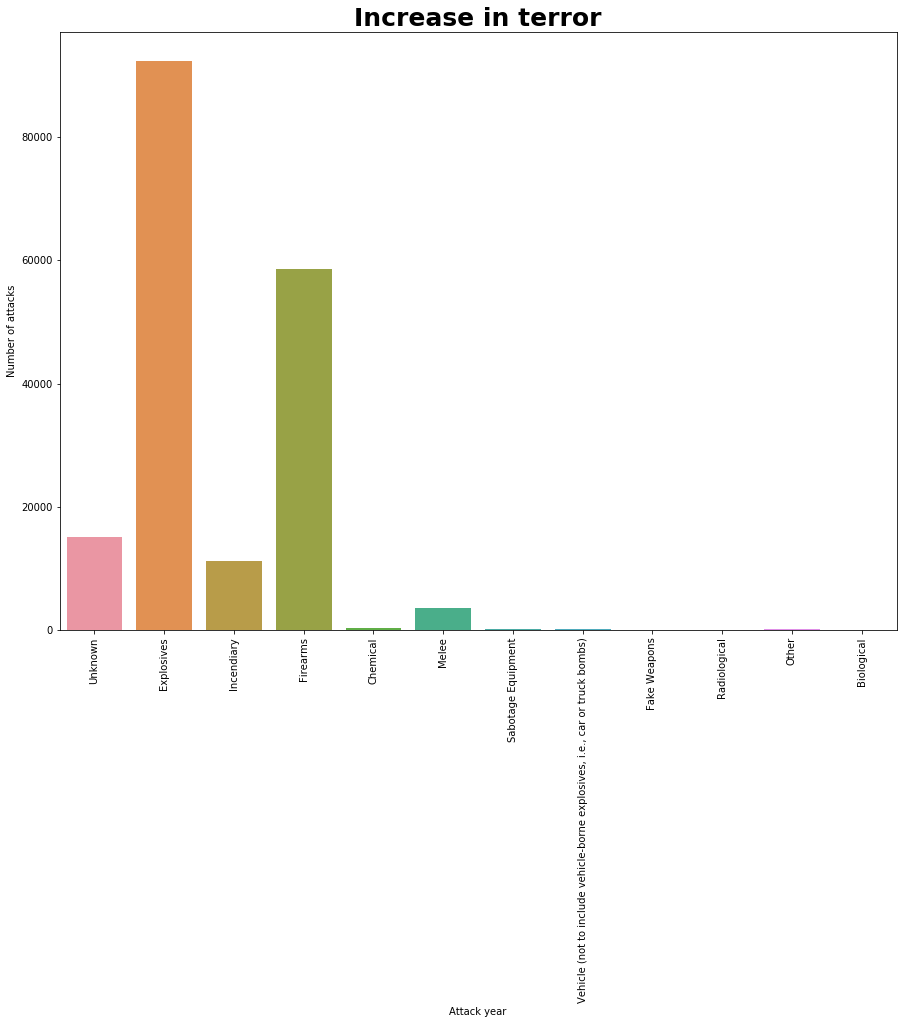

In [21]:
plt.rcParams['figure.figsize']=15,11
sns.countplot(x=df['weaptype1_txt'])
plt.ylabel('Number of attacks')
plt.xlabel('Attack year')
plt.xticks(rotation=90)
plt.title('Increase in terror',size=25,fontweight="bold")


**Explosives and firearms are used mostly**

# In which year how many attack took place

Text(0.5, 1.0, 'Increase in terror')

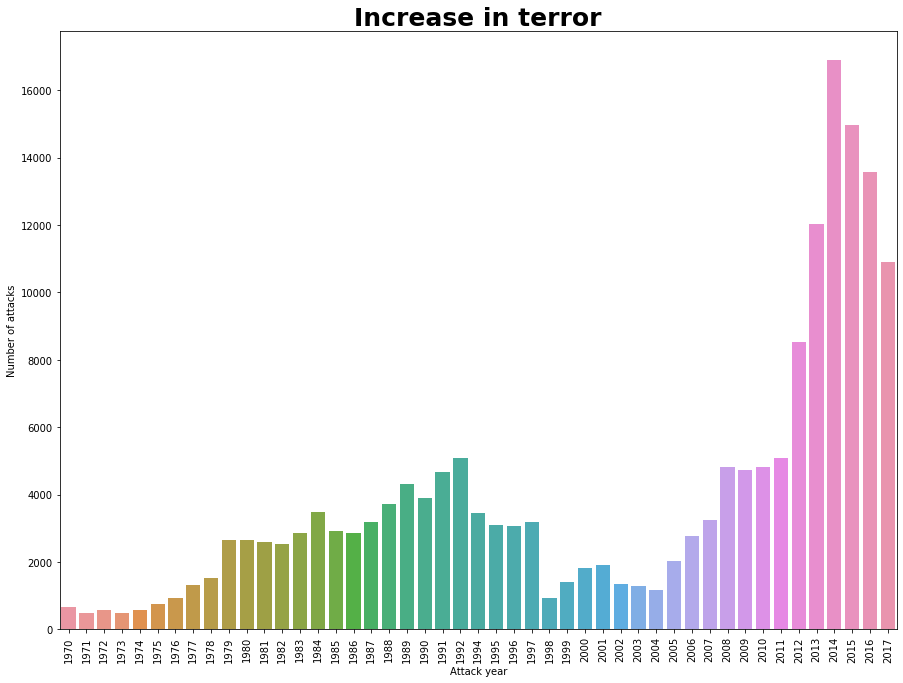

In [22]:
plt.rcParams['figure.figsize']=15,11
sns.countplot(x=df['iyear'])
plt.ylabel('Number of attacks')
plt.xlabel('Attack year')
plt.xticks(rotation=90)
plt.title('Increase in terror',size=25,fontweight="bold")

**Most of the attacks took place respectively in 2014,2015,2016,2013.**

# Successful and unsuccessful attack took place in which year

Text(0.5, 1.0, 'Increase in terror')

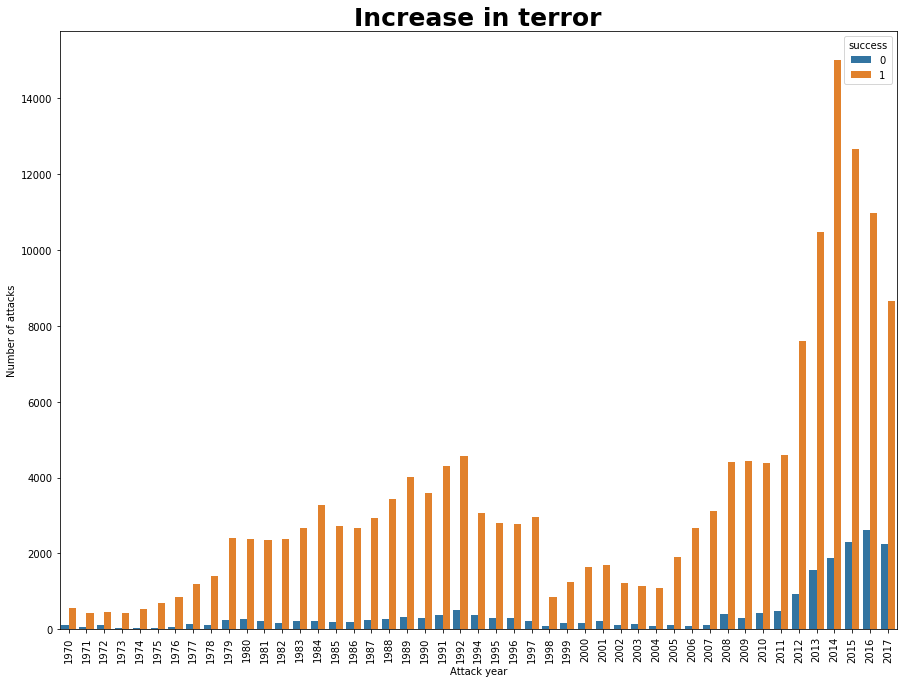

In [23]:
plt.rcParams['figure.figsize']=15,11
sns.countplot(x=df['iyear'],hue='success',data=df)
plt.ylabel('Number of attacks')
plt.xlabel('Attack year')
plt.xticks(rotation=90)
plt.title('Increase in terror',size=25,fontweight="bold")

# How was the attack type

Text(0.5, 1.0, 'Attack types')

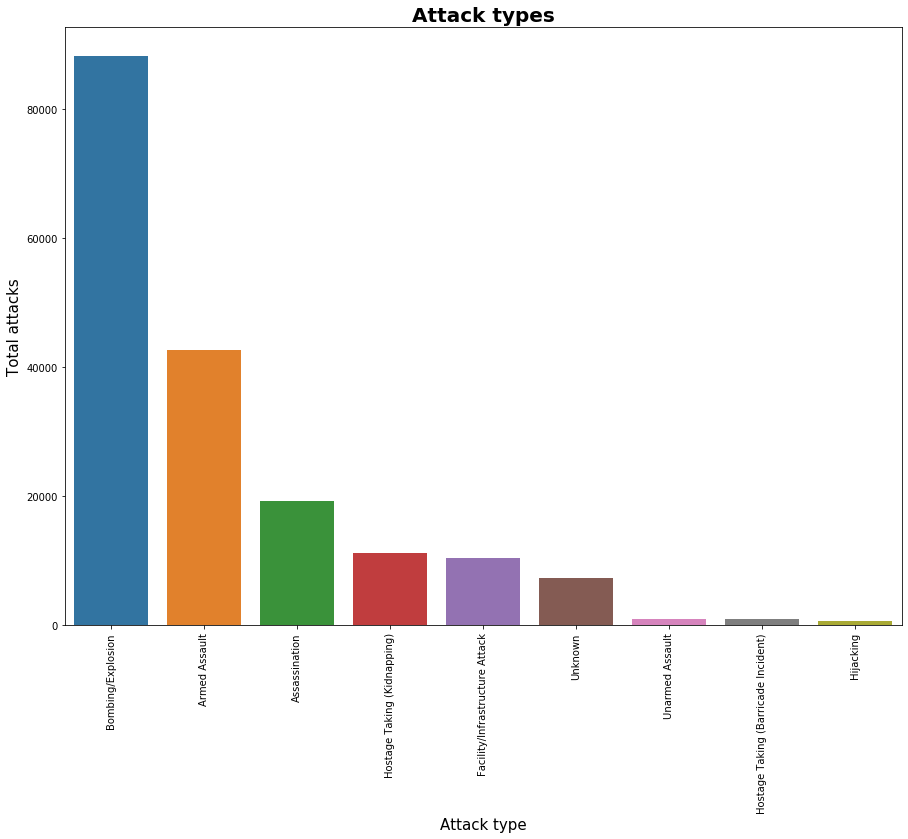

In [26]:
plt.rcParams['figure.figsize']=15,11
sns.barplot(x=df['attacktype1_txt'].value_counts()[:20].index,y=df['attacktype1_txt'].value_counts()[:20].values)
plt.ylabel('Total attacks',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.xticks(rotation=90)
plt.title('Attack types',size=20,fontweight="bold")

# In which country how many attack took place

**most of the attack took place by bombing or explosion**

Text(0.5, 1.0, 'Country wise attack')

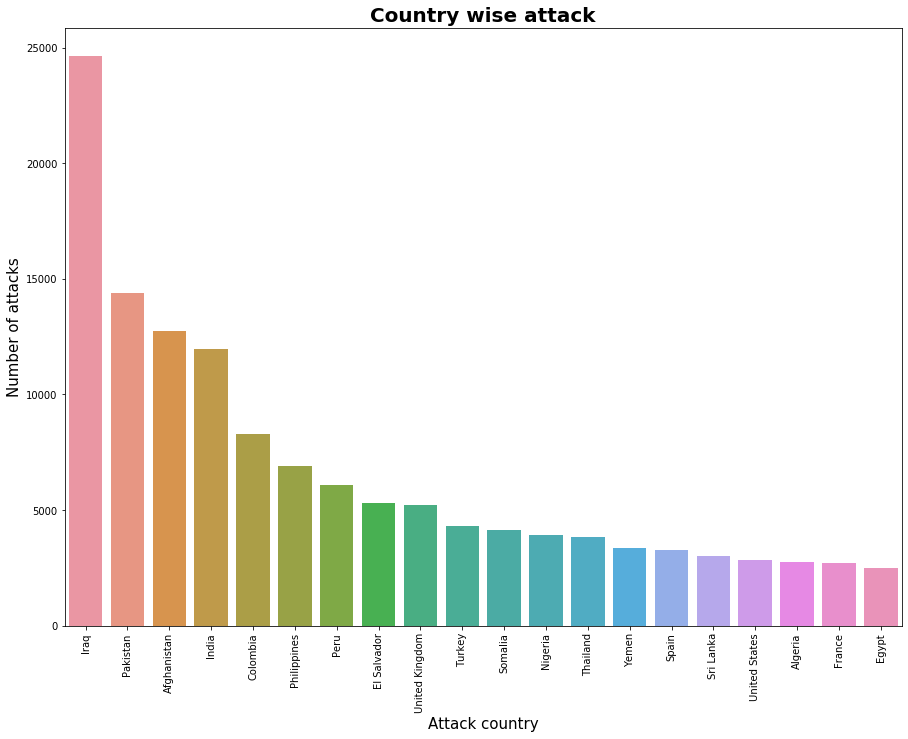

In [27]:
plt.rcParams['figure.figsize']=15,11
sns.barplot(x=df['country_txt'].value_counts()[:20].index,y=df['country_txt'].value_counts()[:20].values)
plt.ylabel('Number of attacks',fontsize=15)
plt.xlabel('Attack country',fontsize=15)
plt.xticks(rotation=90)
plt.title('Country wise attack',size=20,fontweight="bold")

**Iraq suffered from most terrorist attacks**

# Country wise attack whether succcessful or not

Text(0.5, 1.0, 'Country wise attack')

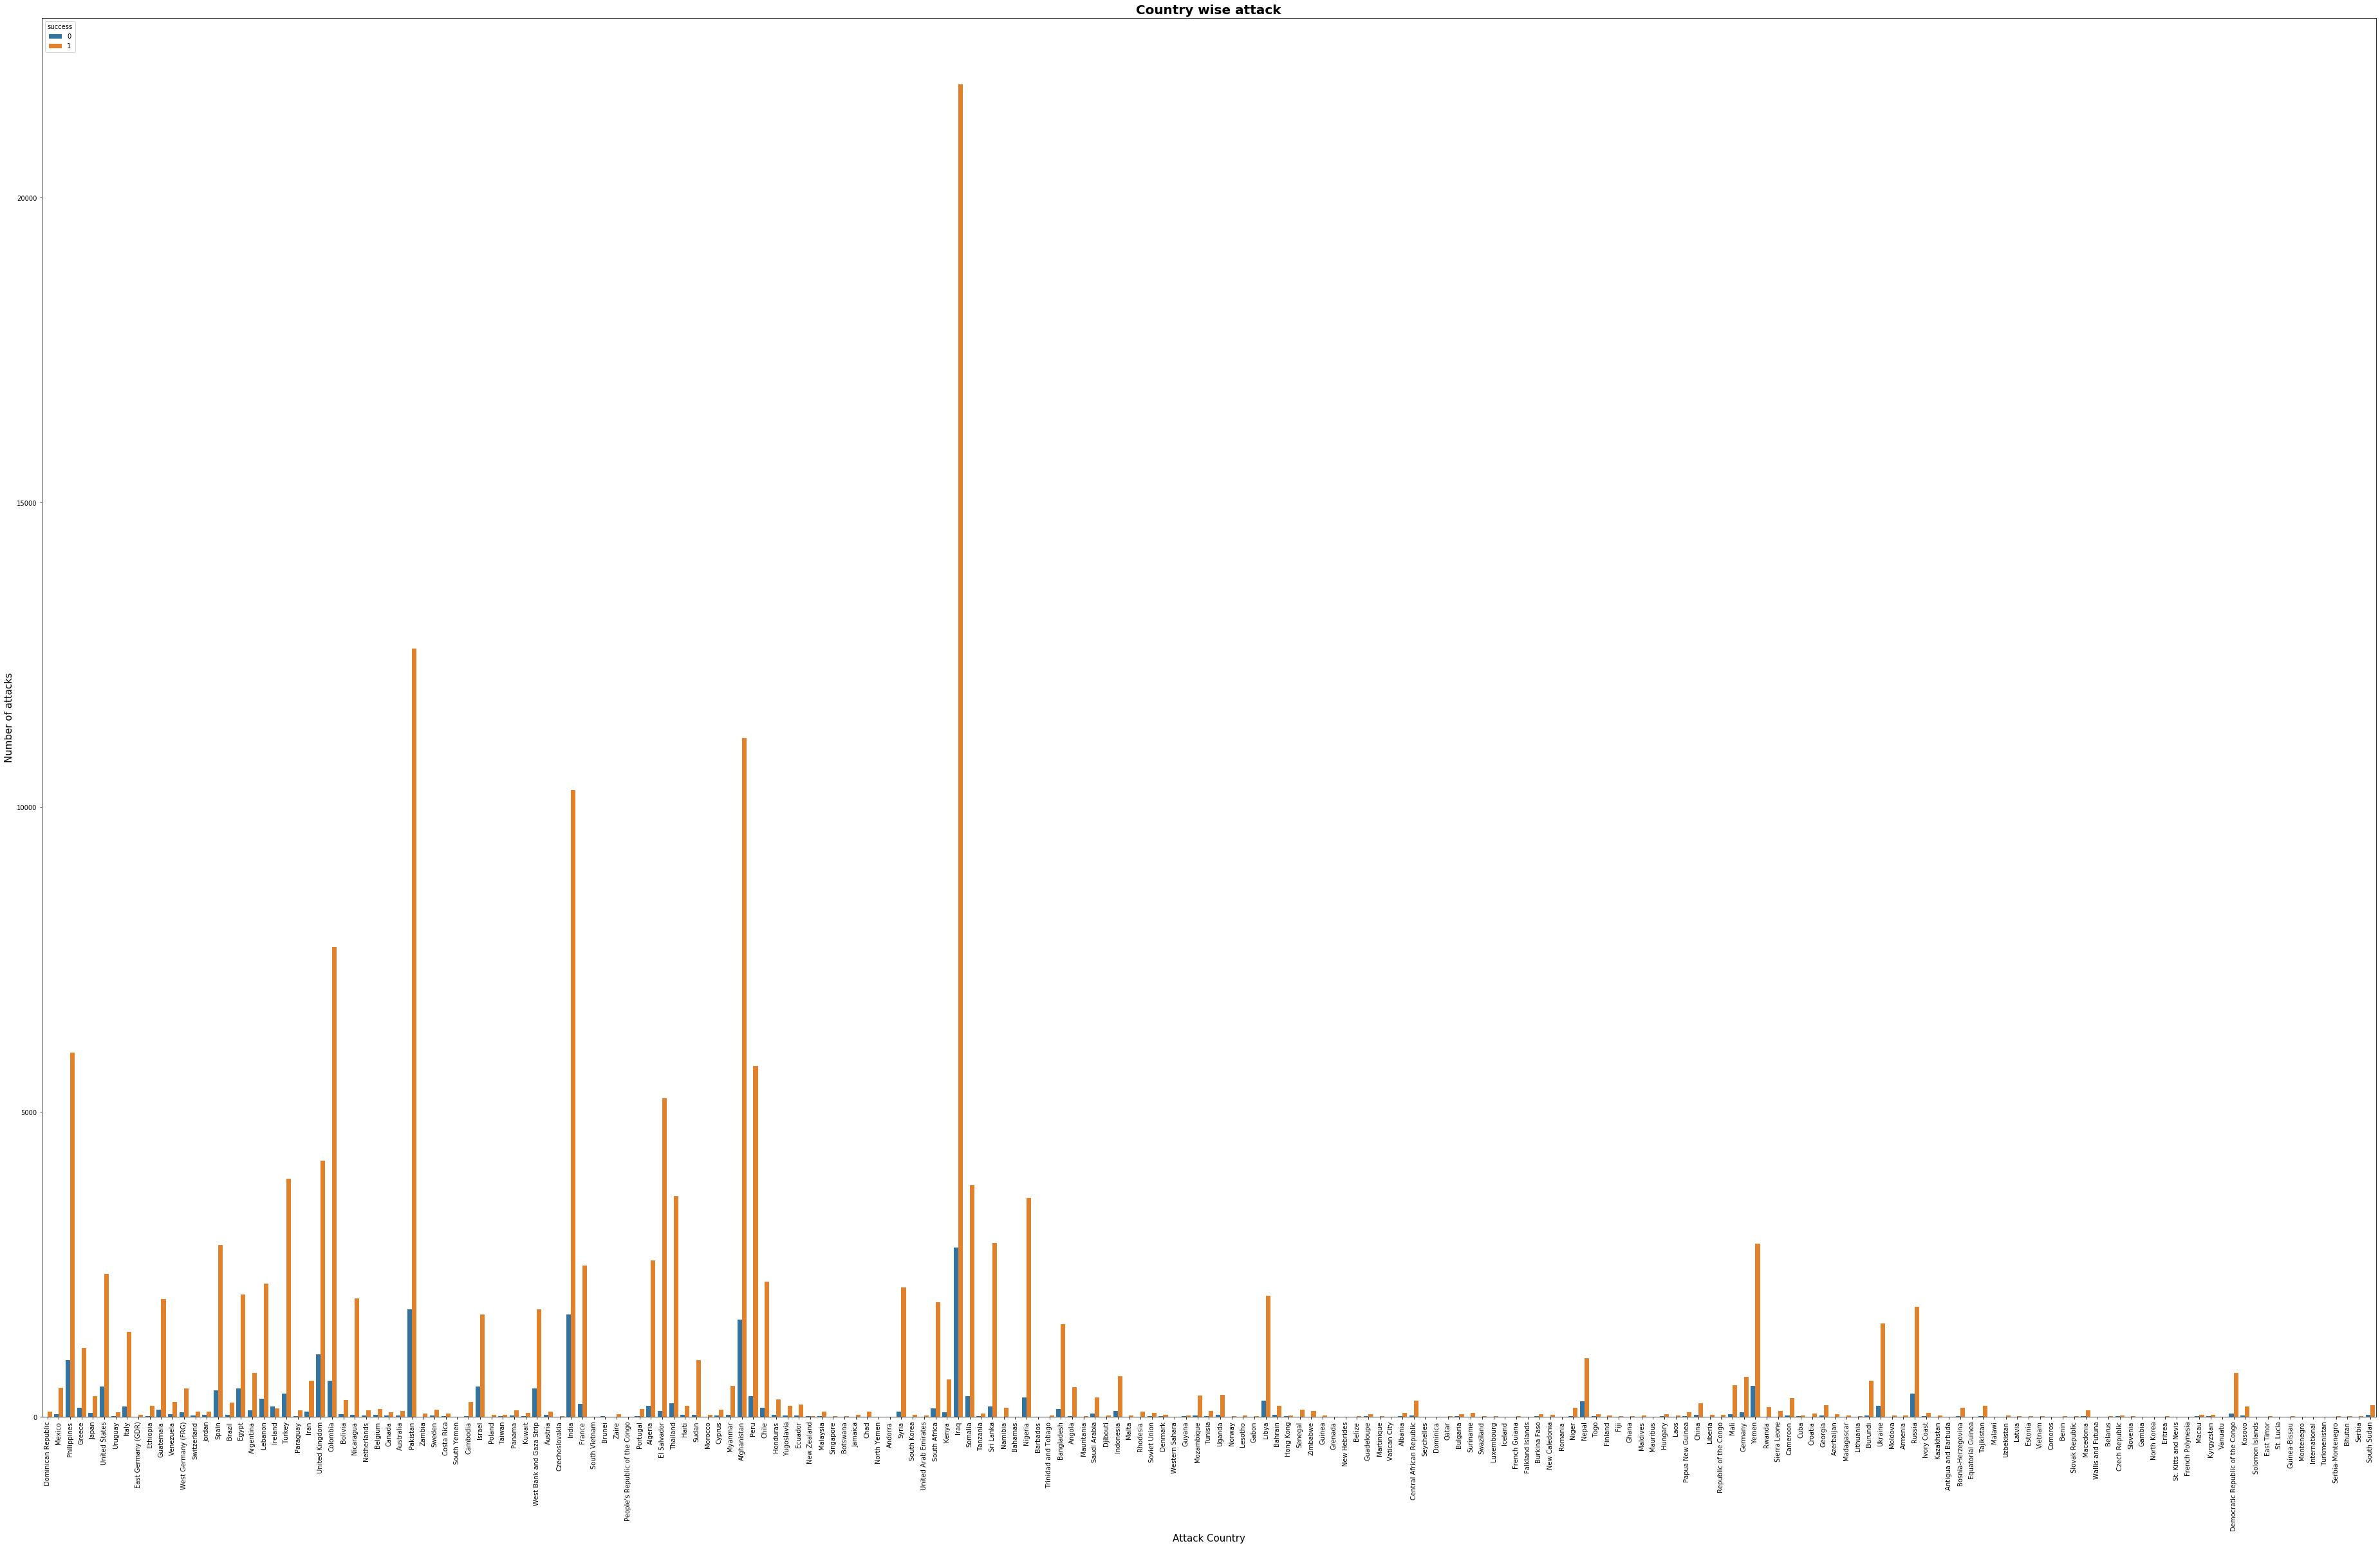

In [29]:
plt.rcParams['figure.figsize']=65,40
sns.countplot(x=df['country_txt'],hue='success',data=df)
plt.ylabel('Number of attacks',fontsize=15)
plt.xlabel('Attack Country',fontsize=15)
plt.xticks(rotation=90)
plt.title('Country wise attack',size=20,fontweight="bold")